<a href="https://colab.research.google.com/github/desakim/ESAA_OB/blob/main/OB4%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(1)_insurance_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 변수 설명
 * age: 나이 (연속형 변수)
 * sex: 성별 (범주형 변수)
 * bmi: (연속형 변수)
 * children: 자녀의 수: (범주형 변수)
 * smoker: 흡연 여부: (범주형 변수)
 * region: 지역 (범주형 변수)
 * charges: 개인별 보험료 (연속형 변수)

https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

→ 결측치 없음

In [5]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
insurance.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# 변수별 그래프

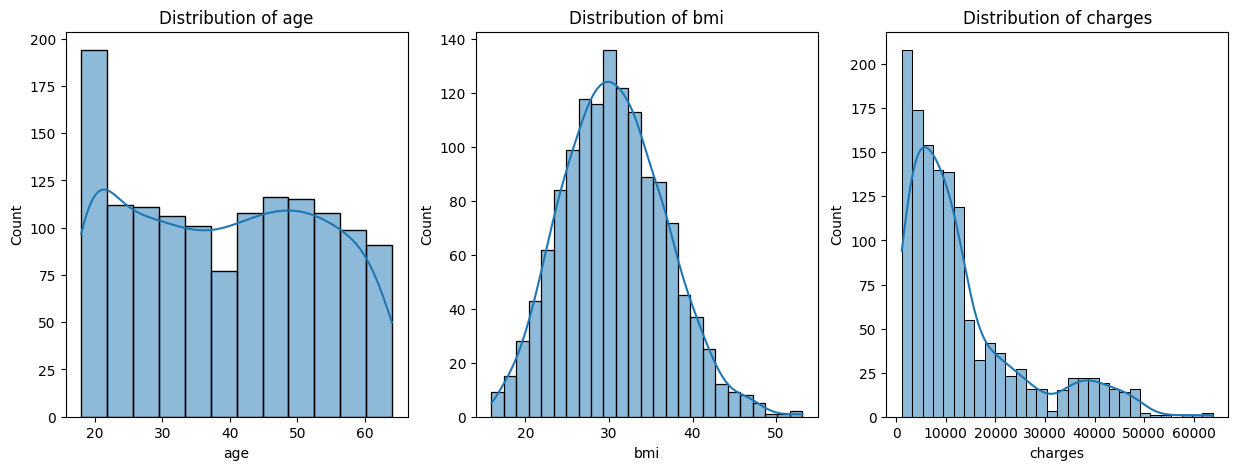

In [9]:
# Numerical Value에 대한 Histogram with KDE graph
plt.figure(figsize = (15, 5))
col = ["age", "bmi", "charges"]

for i in range(3):
  plt.subplot(1, 3, i+1)
  sns.histplot(insurance[col[i]], fill = True, kde = True)
  plt.title(f"Distribution of {col[i]}")
  plt.xlabel(f"{col[i]}")

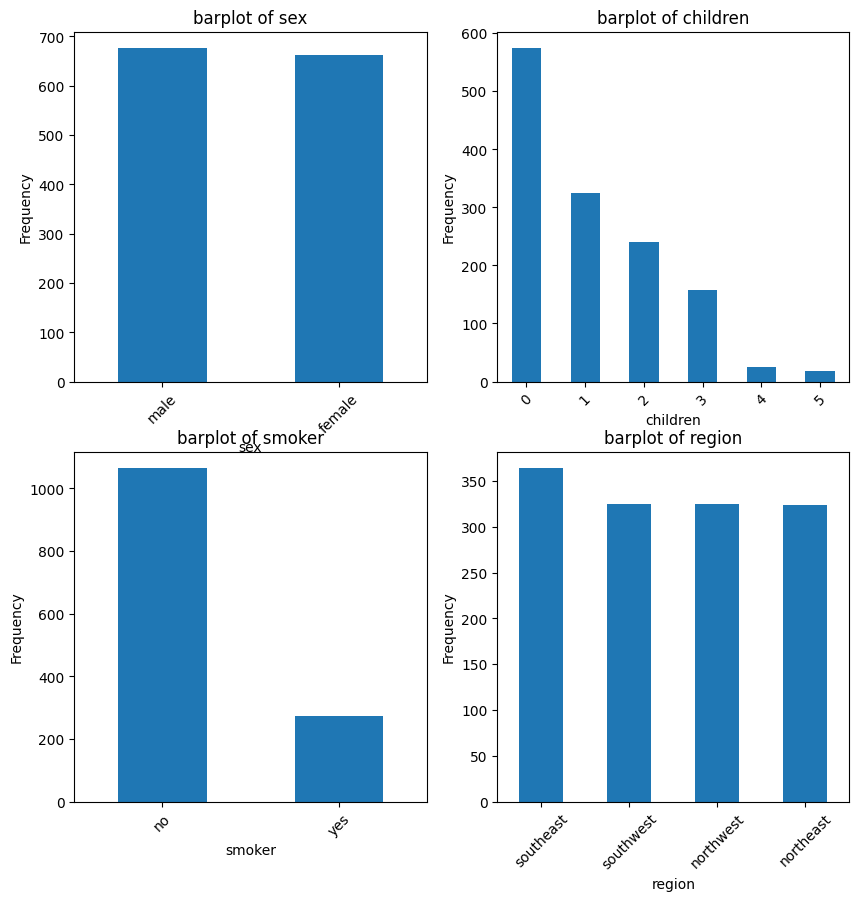

In [10]:
# Categorical Value에 대한 Barplot
plt.figure(figsize = (10, 10))
col = ["sex","children",  "smoker", "region"]

for i in range(4):
  plt.subplot(2, 2, i+1)
  insurance[col[i]].value_counts(sort = True).plot.bar(rot = 45)
  plt.title(f"barplot of {col[i]}")
  plt.xlabel(f"{col[i]}")
  plt.ylabel("Frequency")

plt.show()

###**라벨인코딩**

In [11]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성
le = LabelEncoder()

# fit_transform()으로 라벨인코딩 수행
insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['region'] = le.fit_transform(insurance['region'])

In [12]:
insurance.sex.value_counts()  # female: 0, male: 1

1    676
0    662
Name: sex, dtype: int64

In [13]:
insurance.smoker.value_counts()  # no: 0, yes: 1

0    1064
1     274
Name: smoker, dtype: int64

In [14]:
insurance.region.value_counts()  # northeast: 0, northwest: 1, southeast: 2, southwest: 3

2    364
3    325
1    325
0    324
Name: region, dtype: int64

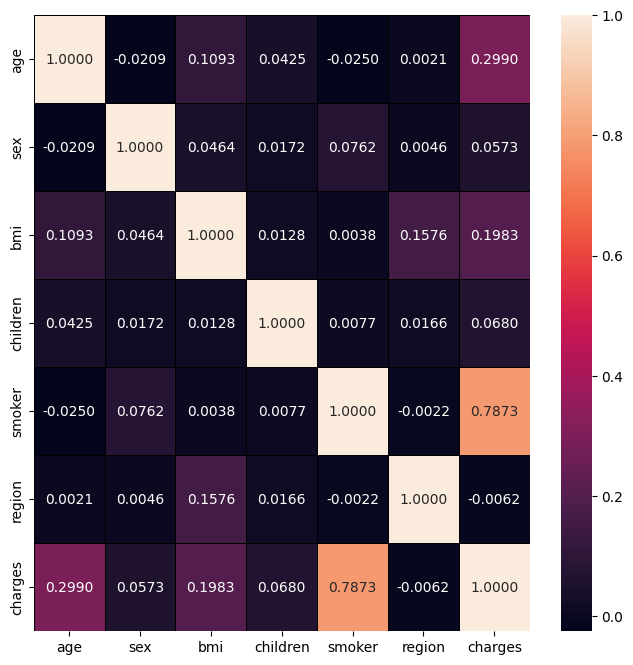

In [15]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(insurance.corr(), annot = True, linewidth = 0.5, linecolor = "black",
            fmt = ".4f", ax = ax)
plt.show()

→ smoker와 charge의 상관관계가 가장 높게 나타남

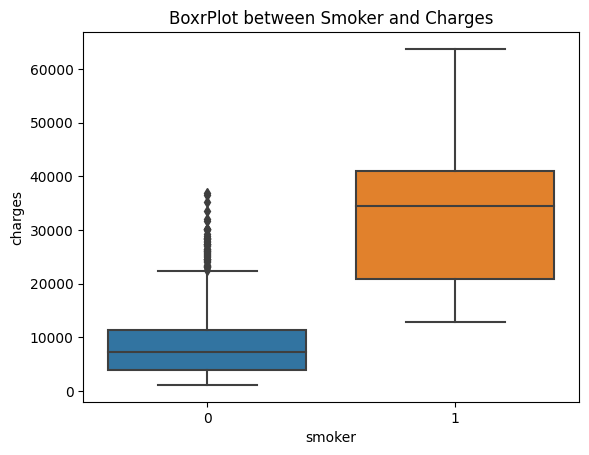

In [16]:
sns.boxplot(x = insurance["smoker"], y = insurance["charges"])
plt.title("BoxrPlot between Smoker and Charges")
plt.show()

####**보험비용 분포**

<ipython-input-17-2eea93fec20a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

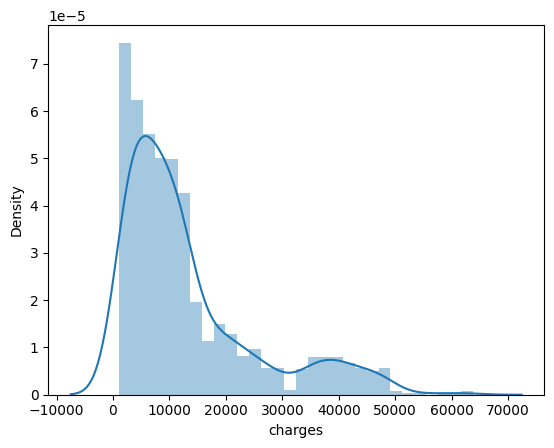

In [17]:
sns.distplot(insurance['charges'])

####**흡연 여부에 따른 보험비용 분포**

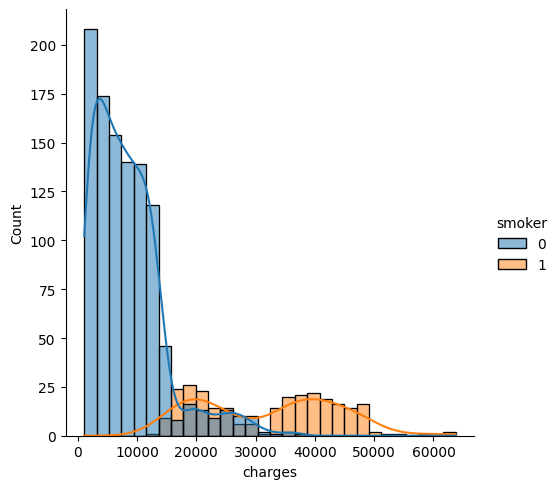

no_smokear_mean_charges: 8434 dollars
smokear_mean_charges: 32050 dollars


In [18]:
sns.displot(insurance, x='charges', kde=True, hue='smoker')
plt.show()
# no: 0, yes: 1

no_smoker_mean_charges = insurance[insurance.smoker==0].charges.mean()
smoker_mean_charges = insurance[insurance.smoker==1].charges.mean()

print(f'no_smokear_mean_charges: {no_smoker_mean_charges:.0f} dollars')
print(f'smokear_mean_charges: {smoker_mean_charges:.0f} dollars')

→ 비흡연자의 경우 charges가 낮은 쪽에 데이터 몰려있음

→ 흡연자는 비흡연자에 비해 더 높은 charges를 부담하는 경향

In [19]:
# 비흡연자의 평균 보험료
insurance[insurance["smoker"] == 0]["charges"].mean()

8434.268297856204

In [20]:
# 흡연자의 평균 보험료
insurance[insurance["smoker"] == 1]["charges"].mean()

32050.23183153284

####**성별에 따른 흡연자 수**

Text(0.5, 1.0, 'The number of smokers and non-smokers by sex')

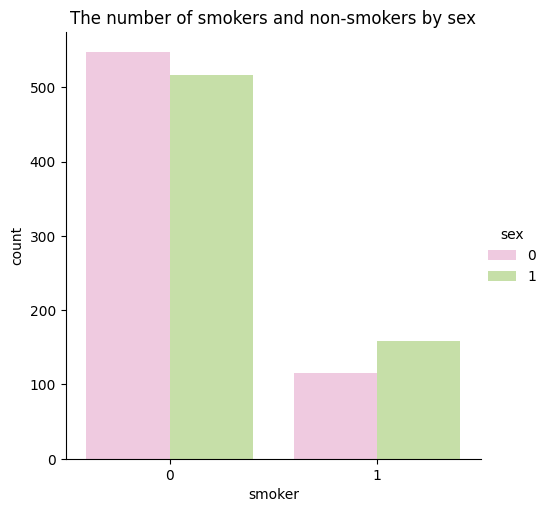

In [21]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette='PiYG', data=insurance)
plt.title("The number of smokers and non-smokers by sex")
# female: 0, male: 1
# no: 0, yes: 1

→ 비흡연자가 흡연자 수보다 많음

→ 비흡연자 여성이 비흡연자 남성 수보다 많고 흡연자 여성이 흡연자 남성 수보다 적게 나타나지만 그 차이가 크진 않음

####**흡연 여부와 성별에 따른 보험비용**

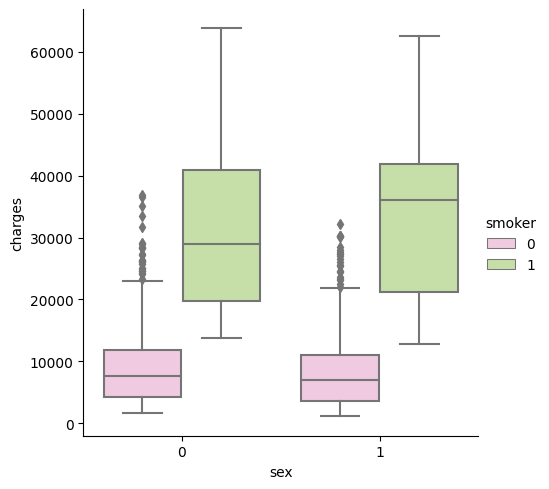

In [22]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='box', palette='PiYG',data=insurance)

→ 여성과 남성 모두 흡연자인 경우에 더 많은 보험비용을 지불함

→ 성별에 따른 보험비용 차이는 거의 없어보임(다만, 남성(sex=1) 흡연자의 charges 중앙값이 더 높게 나타남)

####**지역에 따른 흡연자 수**

Text(0.5, 1.0, 'The number of smokers and non-smokers by region')

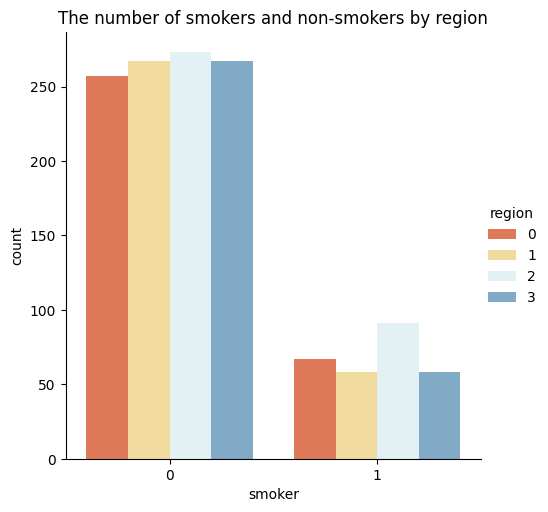

In [23]:
sns.catplot(x="smoker", kind="count",hue = 'region', palette='RdYlBu', data=insurance)
plt.title("The number of smokers and non-smokers by region")
# northeast: 0, northwest: 1, southeast: 2, southwest: 3
# no: 0, yes: 1

####**흡연 여부와 지역에 따른 보험비용**

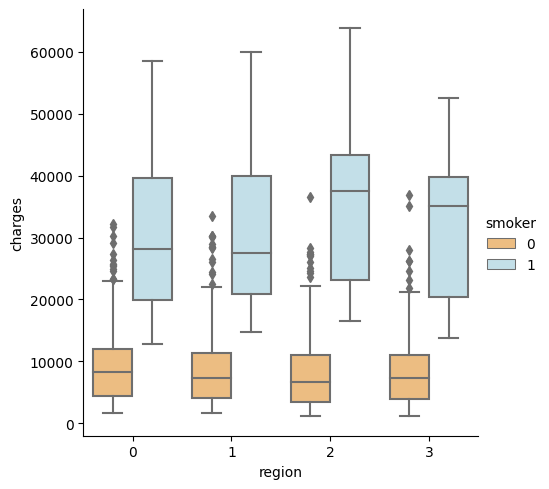

In [24]:
sns.catplot(x='region', y='charges', hue='smoker', kind='box', palette='RdYlBu',data=insurance)
# northeast: 0, northwest: 1, southeast: 2, southwest: 3
# no: 0, yes: 1

####**자녀 수에 따른 흡연자 수**

Text(0.5, 1.0, 'The number of smokers and non-smokers by children')

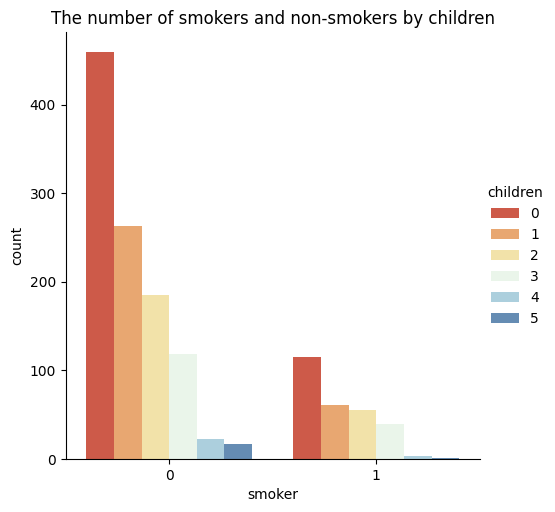

In [25]:
sns.catplot(x="smoker", kind="count",hue = 'children', palette='RdYlBu', data=insurance)
plt.title("The number of smokers and non-smokers by children")
# no: 0, yes: 1

####**흡연 여부와 자녀 수에 따른 보험비용**

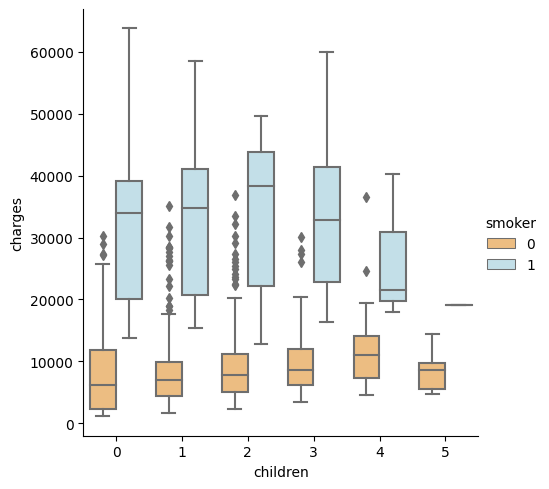

In [26]:
sns.catplot(x='children', y='charges', hue='smoker', kind='box', palette='RdYlBu',data=insurance)
# no: 0, yes: 1

<Figure size 1200x1200 with 0 Axes>

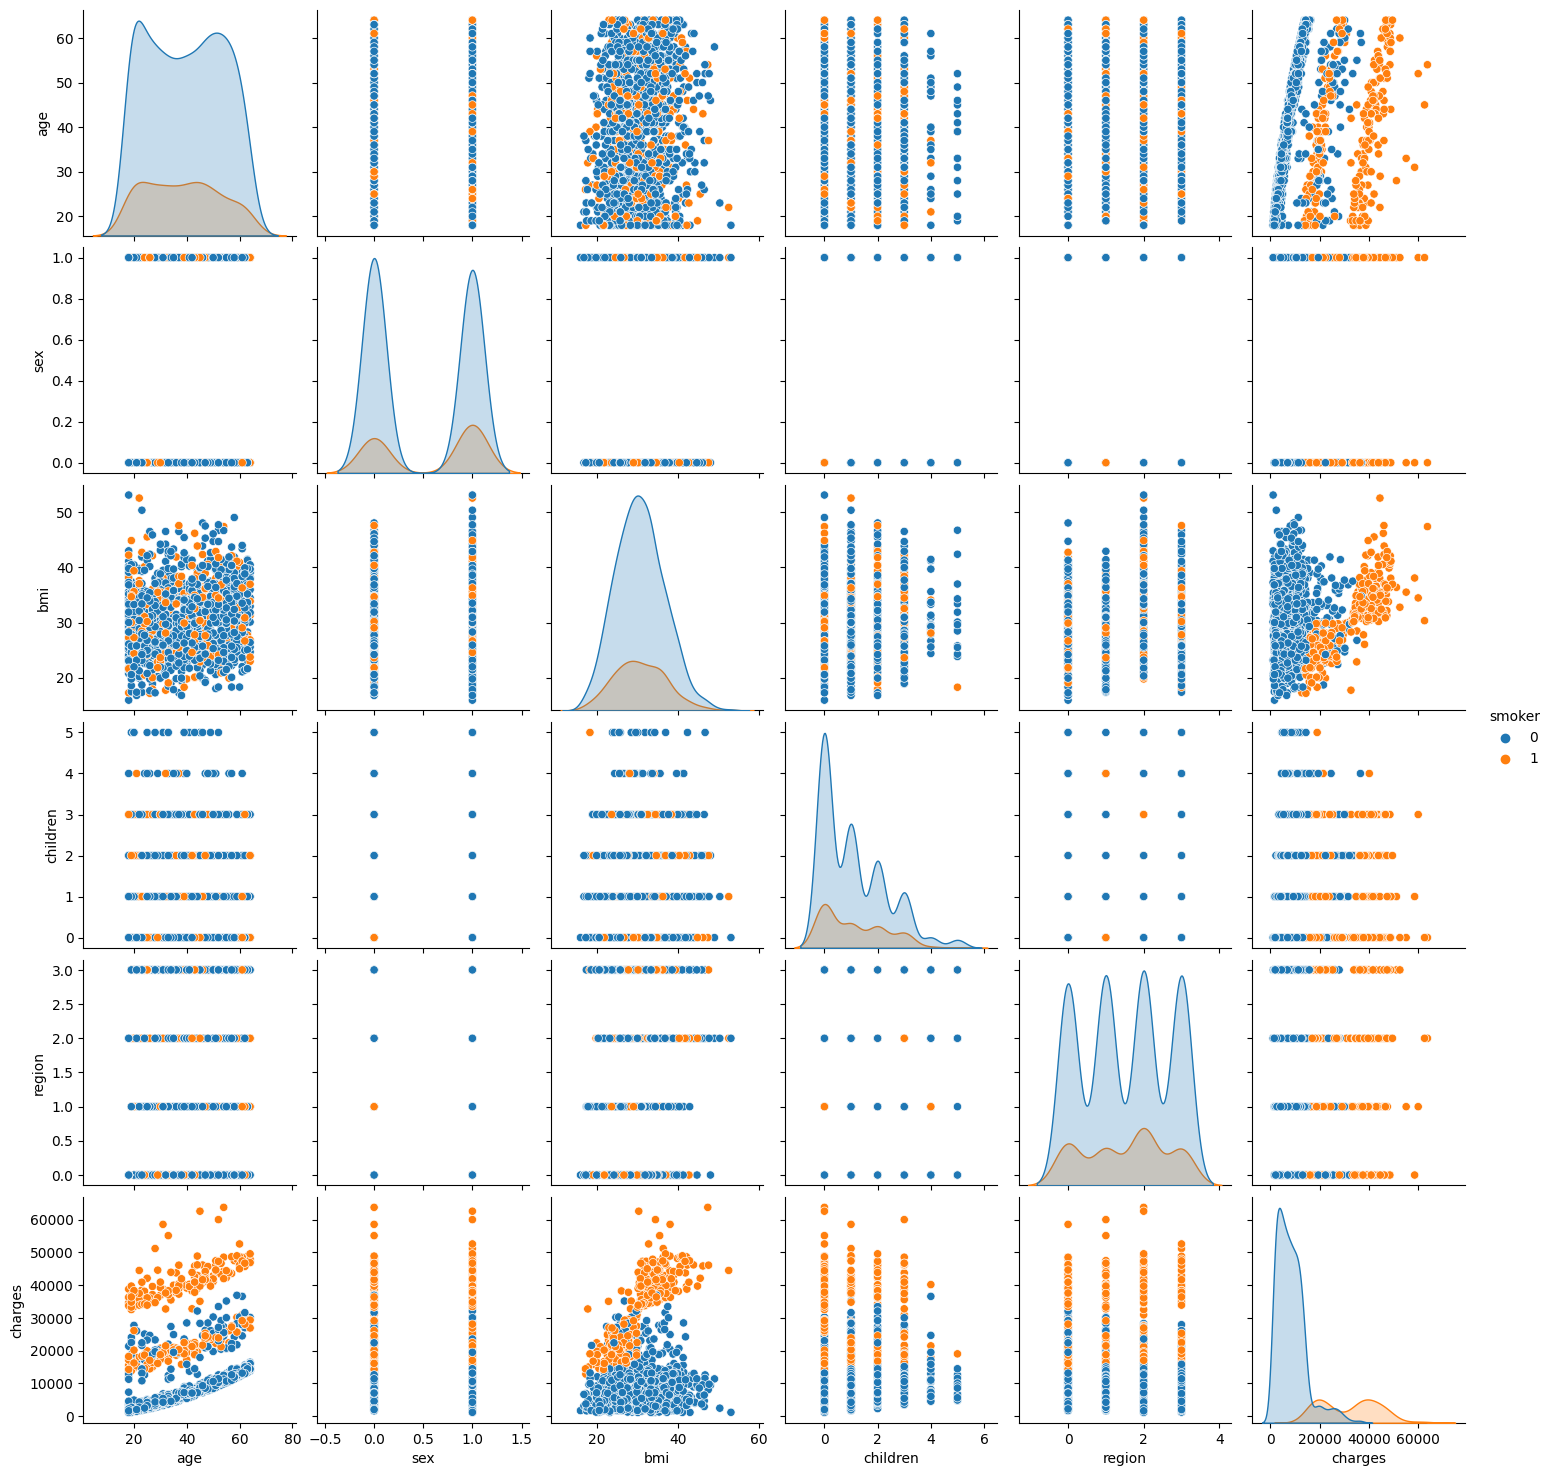

In [27]:
plt.figure(figsize=(12, 12))

sns.pairplot(insurance, hue="smoker")
plt.show()

In [28]:
insurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


####**age-bmi-charges 산점도**

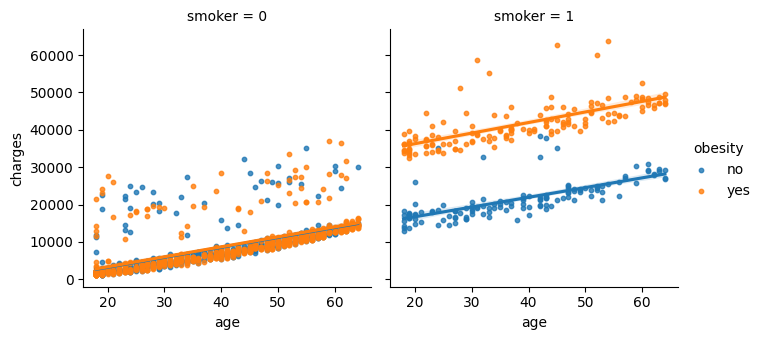

obesity_smoker_mean_charges: 41558 dollars
normal_smoker_mean_charges: 21363 dollars
no_smoker_mean_charges: 8434 dollars


In [29]:
insurance['obesity'] = insurance.bmi.apply(lambda x: 'no' if x<=30 else 'yes')
sns.lmplot(insurance, x='age', y='charges', col='smoker', hue='obesity', height=3.5, scatter_kws={"s": 10})
plt.show()

obesity_smoker_mean_charges = insurance[(insurance.smoker==1) & (insurance.bmi>=30)].charges.mean()
normal_smoker_mean_charges = insurance[(insurance.smoker==1) & (insurance.bmi<30)].charges.mean()
nor_smoker_mean_charges = insurance[insurance.smoker==0].charges.mean()

print(f'obesity_smoker_mean_charges: {obesity_smoker_mean_charges:.0f} dollars')
print(f'normal_smoker_mean_charges: {normal_smoker_mean_charges:.0f} dollars')
print(f'no_smoker_mean_charges: {no_smoker_mean_charges:.0f} dollars')
# no: 0, yes: 1

→ 흡연자인 사람이 체질량 지수 높으면(bmi 30 이상) 더 많은 보험비용 지불

####**bmi-charges 산점도**

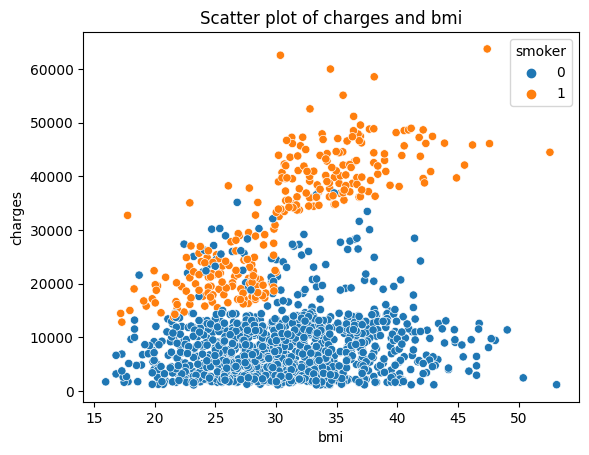

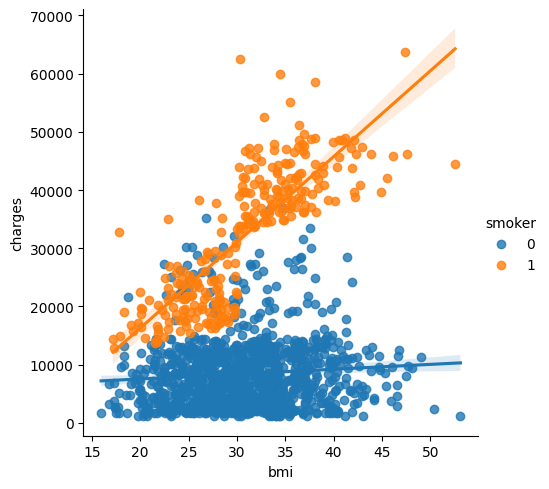

In [30]:
ax = sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance)
# no: 0, yes: 1

# Train Test Split

In [31]:
# Train Test Split
insurance.drop("obesity", axis = 1, inplace = True)

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


# 1. XGBOOST (로그스케일링X)

In [33]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params = {'n_estimators': [50,75,100],
          'max_depth':[2,3,4],
          'min_child_weight':[3,4],
          'learning_rate':[0.05,0.1,0.2],
          'colsample_bytree':[0.5,0.75,1]}
xgb = XGBRegressor()
gridcv = GridSearchCV(xgb, param_grid=params,scoring='neg_mean_squared_error',cv=5)
gridcv.fit(X_train_stan, y_train)

print('최적 하이퍼 파라미터: ',gridcv.best_params_)
print('최고 예측 정확도: ',gridcv.best_score_)

최적 하이퍼 파라미터:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
최고 예측 정확도:  -21521724.888279207


In [35]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

xgb = XGBRegressor(max_depth = 3, n_estimators = 100, learning_rate = 0.05, min_child_weight=4, colsample_bytree=1)
xgb.fit(X_train_stan,y_train)
pred = xgb.predict(X_test_stan)
np.sqrt(mean_squared_error(y_test,pred))

3890.5789229141897

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9048789798316974

# 2. RandomForest (로그스케일링O)

In [37]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

-0.1105100699306014


<ipython-input-38-4b41929080a7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_log);


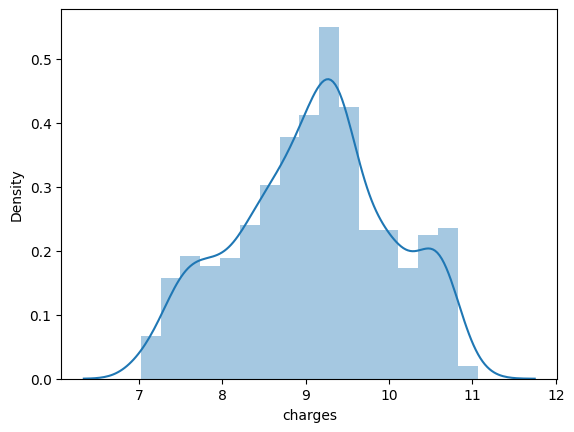

In [38]:
# log scaling
df_log = np.log(y_train)
print(df_log.skew())
sns.distplot(df_log);

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators': [50, 75,100],
          'max_depth':[3,5,10],
          'min_samples_split': [4,8,16]}
rfc = RandomForestRegressor()
gridcv = GridSearchCV(rfc, param_grid=params,scoring='neg_mean_squared_error',cv=5)
gridcv.fit(X_train_stan, df_log)

print('최적 하이퍼 파라미터: ',gridcv.best_params_)
print('최고 예측 정확도: ',gridcv.best_score_)

최적 하이퍼 파라미터:  {'max_depth': 5, 'min_samples_split': 16, 'n_estimators': 50}
최고 예측 정확도:  -0.15082740695936972


In [40]:
rnd_clf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=4, n_jobs=-1)
rnd_clf.fit(X_train_stan, df_log)
pred_rf = rnd_clf.predict(X_test_stan)
y_pred_rf = np.expm1(pred_rf)
np.sqrt(mean_squared_error(y_test,y_pred_rf))

4002.0680351393944

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.899349259409348

# 3. Decision Tree

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor

In [43]:
# 데이터 분리

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


### 3.1 Decision Tree 모델링
> * RMSE: 7484.624872977594
* r2_score: 0.6479631574612279

In [46]:
# 모델 생성
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)



# 모델 평가
y_pred = dt_model.predict(X_test)  # 모델로 예측한 값

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)

RMSE: 7686.628286982048
r2_score: 0.6287044026150854


### 3.2 Decision Tree 하이퍼파라미터 튜닝
> * RMSE: 4387.780123053731
* r2_score: 0.8790132660919476

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 15, 20],  # 최대 깊이
    'min_samples_split': [20,30,40],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [4,6,8],   # 리프 노드 최소 샘플 수
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 모델 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("최적 하이퍼파라미터:", best_params)

# 모델 평가
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)


최적 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 40}
RMSE: 4387.780123053731
r2_score: 0.8790132660919476


# 4. LightGBM


### 4.1 LightGBM 모델링
> * RMSE: 4337.067744354993
* r2_score: 0.8817937467926547

In [48]:
# 모델 생성
lgbm_model = LGBMRegressor()

lgbm_model.fit(X_train, y_train)


# 모델 평가
y_pred = lgbm_model.predict(X_test)  # 모델로 예측한 값

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13201.182046
RMSE: 4337.067744354993
r2_score: 0.8817937467926547


### 4.2 LightGBM 하이퍼파라미터 튜닝

> GridSearchCV
* RMSE: 4003
* r2_score: 0.8993

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15, 20, 30],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40]
}
grid_search = GridSearchCV(lgbm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 모델 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("최적 하이퍼파라미터:", best_params)

# 모델 평가
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13201.182046
최적 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 300, 'num_leaves': 20}
RMSE: 4003.310888260154
r2_score: 0.8992867349794254


> 가장 높음

### 4.3 LightGBM 스케일링 후 모델링

In [50]:
#스케일링, 튜닝 X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lgbm_model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = lgbm_model.predict(X_test_scaled)  # 모델로 예측한 값

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("r2_score:", r2)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13201.182046
RMSE: 4415.7183596023215
r2_score: 0.8774676475329127


In [51]:
# 로그 스케일링, 튜닝 X

y_train_log = np.log(y_train)

# 모델 학습 (예: LightGBM 모델)
lgbm_model.fit(X_train, y_train_log)

# 테스트 데이터에서 예측
y_pred_log = lgbm_model.predict(X_test)

# 예측 결과를 역 로그 변환
y_pred = np.exp(y_pred_log)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("r2_score:", r2)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 9.095056
RMSE: 4014.1725909746633
r2_score: 0.8987394871776967


In [52]:
#로그+튜닝

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [15, 20, 30],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 30, 40]
}

y_train_log = np.log(y_train)

grid_search = GridSearchCV(lgbm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_log)

# 최적의 하이퍼파라미터 및 모델 출력
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("최적 하이퍼파라미터:", best_params)

# 테스트 데이터에서 예측 및 RMSE 계산
y_pred_log = lgbm_model.predict(X_test)
y_pred = np.exp(y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2_score:", r2)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 9.095056
최적 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 300, 'num_leaves': 20}
RMSE: 4014.1725909746633
r2_score: 0.8987394871776967


# 5. 엘라스틱넷

In [53]:
#Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

5.1 엘라스틱넷 (로그 스케일링 X)

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
#점수: 0.8987394871776967 (채택)
elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.05, 0.1, 1.0, 10.0, 25.0, 50.0, 100.0],
    'l1_ratio': [0.05, 0.1, 0.5, 0.9, 1.0]
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2_score:", r2)

Best Parameters: {'alpha': 25.0, 'l1_ratio': 1.0}
RMSE: 4014.1725909746633
r2_score: 0.8987394871776967


5.2 엘라스틱넷 (로그 스케일링 O)

In [56]:
#log scaling
#점수: 0.6484998820361405
y_train_log = np.log(y_train)
elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.05, 0.1, 1.0, 10.0, 25.0, 50.0, 100.0],
    'l1_ratio': [0.05, 0.1, 0.5, 0.9, 1.0]
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_log)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("r2_score:", r2)

Best Parameters: {'alpha': 0.05, 'l1_ratio': 0.05}
RMSE: 7478.91706918934
r2_score: 0.6484998820361405


# 6. GBM

6.1 GBM (로그 스케일링 X)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
#점수: 0.9003856398125568 (채택)
gbm = GradientBoostingRegressor(random_state=0)

param_grid = {
    'n_estimators': [100, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("r2_score:", r2)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
RMSE: 3981.4104766238906
r2_score: 0.9003856398125568


6.2 GBM (로그 스케일링 O)

In [59]:
#log scaling
#점수: 0.898891920337483
y_train_log = np.log(y_train)

gbm = GradientBoostingRegressor(random_state=0)

param_grid = {
    'n_estimators': [100, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_log)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("r2_score:", r2)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
RMSE: 4011.1500728792
r2_score: 0.898891920337483
